In [80]:
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [1]:
from __future__ import division
import glob
import os
import pyfits
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import pywcs
import os, sys
from astropy.io import fits
import matplotlib
%matplotlib inline
from matplotlib import pylab
from scipy.integrate import quad
import scipy
from scipy import stats
import astropy.io.ascii as ascii
import shutil
import glob
from astropy.io import fits

pha_data = fits.open("3dhst.v4.1.4.full.v1.fits")[1].data
pha_uds = np.array(pha_data[163865:207967])
pha_aegis = np.array(pha_data[0:41200])
pha_cosmos = np.array(pha_data[41200:75079])
pha_north = np.array(pha_data[75079:113358])
pha_south = np.array(pha_data[113358:163865])

new_data = fits.open("3dhst.v4.1.5.master.fits")[1].data
new_uds = np.array(new_data[163865:207967])
new_aegis = np.array(new_data[0:41200])
new_cosmos = np.array(new_data[41200:75079])
new_north = np.array(new_data[75079:113358])
new_south = np.array(new_data[113358:163865])

north_lines = fits.open("goodsn.linefit.linematched_all.v4.1.5.fits")[1].data
goodsn_lines = north_lines
aegis_lines = fits.open("aegis.linefit.linematched_all.v4.1.5.fits")[1].data
cosmos_lines = fits.open("cosmos.linefit.linematched_all.v4.1.5.fits")[1].data
north_lines = fits.open("goodsn.linefit.linematched_all.v4.1.5.fits")[1].data
south_lines = fits.open("goodss.linefit.linematched_all.v4.1.5.fits")[1].data
goodss_lines = south_lines
uds_lines = fits.open("uds.linefit.linematched_all.v4.1.5.fits")[1].data

aegis_list = fits.open('aegis_3dhst.v4.1.cat.FITS', memmap=True)
aegis_data = aegis_list[1].data
south_list = fits.open('goodss_3dhst.v4.1.cat.FITS', memmap=True)
south_data = south_list[1].data
north_list = fits.open('goodsn_3dhst.v4.1.cat.FITS', memmap=True)
north_data = north_list[1].data
uds_list = fits.open('uds_3dhst.v4.2.cat.FITS', memmap=True)
uds_data = uds_list[1].data
cosmos_list = fits.open('cosmos_3dhst.v4.1.cat.FITS', memmap=True)
cosmos_data = cosmos_list[1].data

def name_rotator(command):
    print command + "\n\n" + (command.replace("aegis","cosmos")).replace("AEGIS", "COSMOS") + "\n\n" \
+(command.replace("aegis","goodsn")).replace("AEGIS", "GOODS-N") + "\n\n" +(command.replace("aegis","goodss")).replace("AEGIS", "GOODS-S") \
+ "\n\n" +(command.replace("aegis","uds")).replace("AEGIS", "UDS")

In [2]:
# -1 no flag, 0 good, 1 bad, 2 unclear
aegis_grism = fits.open('./aegis_3dhst_v4.1.5_catalogs/aegis_3dhst.v4.1.5.zfit.concat.fits', memmap=True)[1].data
cosmos_grism = fits.open('./cosmos_3dhst_v4.1.5_catalogs/cosmos_3dhst.v4.1.5.zfit.concat.fits', memmap=True)[1].data
goodsn_grism = fits.open('./goodsn_3dhst_v4.1.5_catalogs/goodsn_3dhst.v4.1.5.zfit.concat.fits', memmap=True)[1].data
goodss_grism = fits.open('./goodss_3dhst_v4.1.5_catalogs/goodss_3dhst.v4.1.5.zfit.concat.fits', memmap=True)[1].data
uds_grism = fits.open('./uds_3dhst_v4.1.5_catalogs/uds_3dhst.v4.1.5.zfit.concat.fits', memmap=True)[1].data

In [3]:
aegis_grism.columns

ColDefs(
    name = 'phot_id'; format = 'K'
    name = 'grism_id'; format = '19A'
    name = 'jh_mag'; format = 'D'
    name = 'z_spec'; format = 'D'
    name = 'z_peak_phot'; format = 'D'
    name = 'z_phot_l95'; format = 'D'
    name = 'z_phot_l68'; format = 'D'
    name = 'z_phot_u68'; format = 'D'
    name = 'z_phot_u95'; format = 'D'
    name = 'z_max_grism'; format = 'D'
    name = 'z_peak_grism'; format = 'D'
    name = 'l95'; format = 'D'
    name = 'l68'; format = 'D'
    name = 'u68'; format = 'D'
    name = 'u95'; format = 'D'
    name = 'f_cover'; format = 'D'
    name = 'f_flagged'; format = 'D'
    name = 'max_contam'; format = 'D'
    name = 'int_contam'; format = 'D'
    name = 'f_negative'; format = 'D'
    name = 'flag1'; format = 'K'
    name = 'flag2'; format = 'K'
)

In [189]:
gui_grisms = np.loadtxt("gui_selections_grism_ids.dat", dtype=str)

In [210]:
grismkv = np.array([1 if x in gui_grisms else 0 for x in grism_id], dtype=bool)

In [183]:
grism_id = np.concatenate((aegis_grism['grism_id'], \

cosmos_grism['grism_id'], \

goodsn_grism['grism_id'], \

goodss_grism['grism_id'], \

uds_grism['grism_id']))

In [9]:
f_flagged = np.concatenate((aegis_grism['f_flagged'], \

cosmos_grism['f_flagged'], \

goodsn_grism['f_flagged'], \

goodss_grism['f_flagged'], \

uds_grism['f_flagged']))

In [212]:
flag2_old = np.concatenate((aegis_grism['flag2'], \

cosmos_grism['flag2'], \

goodsn_grism['flag2'], \

goodss_grism['flag2'], \

uds_grism['flag2']))

In [213]:
flag1_old = np.concatenate((aegis_grism['flag1'], \

cosmos_grism['flag1'], \

goodsn_grism['flag1'], \

goodss_grism['flag1'], \

uds_grism['flag1']))

In [221]:
len(flag1_old)

98663

In [214]:
flag1 = np.array([1 if y else x for x,y in zip(flag1_old, grismkv)])
flag2 = np.array([1 if y else x for x,y in zip(flag2_old, grismkv)])

In [223]:
f_negative = np.concatenate((aegis_grism['f_negative'], \

cosmos_grism['f_negative'], \

goodsn_grism['f_negative'], \

goodss_grism['f_negative'], \

uds_grism['f_negative']))

In [224]:
max_contam = np.concatenate((aegis_grism['max_contam'], \

cosmos_grism['max_contam'], \

goodsn_grism['max_contam'], \

goodss_grism['max_contam'], \

uds_grism['max_contam']))

In [225]:
f_cover = np.concatenate((aegis_grism['f_cover'], \

cosmos_grism['f_cover'], \

goodsn_grism['f_cover'], \

goodss_grism['f_cover'], \

uds_grism['f_cover']))

In [226]:
z_max_grism = np.concatenate((aegis_grism['z_max_grism'], \

cosmos_grism['z_max_grism'], \

goodsn_grism['z_max_grism'], \

goodss_grism['z_max_grism'], \

uds_grism['z_max_grism']))

In [227]:
z_peak_phot = np.concatenate((aegis_grism['z_peak_phot'], \

cosmos_grism['z_peak_phot'], \

goodsn_grism['z_peak_phot'], \

goodss_grism['z_peak_phot'], \

uds_grism['z_peak_phot']))

In [228]:
delta_z = ((z_peak_phot - z_max_grism)/(z_peak_phot))

In [229]:
fil_1 = np.array([1 if (x==y)&((x==1)|(x==0)) else 0 for x, y in zip(flag1, flag2)], dtype=bool)
fil_2= (z_peak_phot!=-99)

In [232]:
scipy.stats.itemfreq(flag1[fil_1 & fil_2])

array([[    0, 24895],
       [    1,  1136]], dtype=int64)

In [233]:
random_zeros = random.sample((np.where(flag1[fil_1 & fil_2] == 0)[0]), 1136)
fil_3 = np.array([1 if ((x in random_zeros)|( flag1[(fil_1) & (fil_2)][x] == 1)) else 0 for x in \
                  np.linspace(0,len(flag1[fil_1 & fil_2] == 0)-1,len(flag1[fil_1 & fil_2] == 0))] ,dtype=bool)

In [234]:
#variables: delta_z, f_cover, f_negative, f_flagged
datasets= [([[a,b,c,d] for a,b,c,d in zip(delta_z[fil_1 & fil_2][fil_3] ,f_cover[fil_1 & fil_2][fil_3], f_negative[fil_1 & fil_2][fil_3], f_flagged[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[a,b,c] for a,b,c in zip(delta_z[fil_1 & fil_2][fil_3] ,f_cover[fil_1 & fil_2][fil_3], f_negative[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[b,c,d] for b,c,d in zip(f_cover[fil_1 & fil_2][fil_3], f_negative[fil_1 & fil_2][fil_3], f_flagged[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[a,c,d] for a,c,d in zip(delta_z[fil_1 & fil_2][fil_3] , f_negative[fil_1 & fil_2][fil_3], f_flagged[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[a,b,d] for a,b,d in zip(delta_z[fil_1 & fil_2][fil_3] ,f_cover[fil_1 & fil_2][fil_3], f_flagged[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[a,b] for a,b in zip(delta_z[fil_1 & fil_2][fil_3] ,f_cover[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[a,c] for a,c in zip(delta_z[fil_1 & fil_2][fil_3], f_negative[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[a,d] for a,d in zip(delta_z[fil_1 & fil_2][fil_3], f_flagged[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[b,c] for b,c in zip(f_cover[fil_1 & fil_2][fil_3], f_negative[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[b,d] for b,d in zip(f_cover[fil_1 & fil_2][fil_3], f_flagged[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ([[c,d] for c,d in zip(f_negative[fil_1 & fil_2][fil_3], f_flagged[fil_1 & fil_2][fil_3])],\
flag1[fil_1 & fil_2][fil_3]),\
           ( [[a] for a in delta_z[fil_1 & fil_2][fil_3]],\
flag1[fil_1 & fil_2][fil_3]),\
           ( [[b] for b in f_cover[fil_1 & fil_2][fil_3]],\
flag1[fil_1 & fil_2][fil_3]),\
           ( [[c] for c in f_negative[fil_1 & fil_2][fil_3]],\
flag1[fil_1 & fil_2][fil_3]),\
           ( [[d] for d in f_flagged[fil_1 & fil_2][fil_3]],\
flag1[fil_1 & fil_2][fil_3]),\
          ]

In [235]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [236]:
index=-1
for ds in datasets:
    index = index+1
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print "Name:%s, Score: %s, Index: %d"%(name, score, index)

Name:Nearest Neighbors, Score: 0.836083608361, Index: 0
Name:Linear SVM, Score: 0.840484048405, Index: 0
Name:RBF SVM, Score: 0.836083608361, Index: 0
Name:Decision Tree, Score: 0.843784378438, Index: 0
Name:Random Forest, Score: 0.825082508251, Index: 0
Name:AdaBoost, Score: 0.851485148515, Index: 0
Name:Naive Bayes, Score: 0.818481848185, Index: 0
Name:Linear Discriminant Analysis, Score: 0.817381738174, Index: 0
Name:Quadratic Discriminant Analysis, Score: 0.819581958196, Index: 0
Name:Nearest Neighbors, Score: 0.794279427943, Index: 1
Name:Linear SVM, Score: 0.808580858086, Index: 1
Name:RBF SVM, Score: 0.798679867987, Index: 1
Name:Decision Tree, Score: 0.804180418042, Index: 1
Name:Random Forest, Score: 0.819581958196, Index: 1
Name:AdaBoost, Score: 0.825082508251, Index: 1
Name:Naive Bayes, Score: 0.775577557756, Index: 1
Name:Linear Discriminant Analysis, Score: 0.806380638064, Index: 1
Name:Quadratic Discriminant Analysis, Score: 0.773377337734, Index: 1
Name:Nearest Neighbors

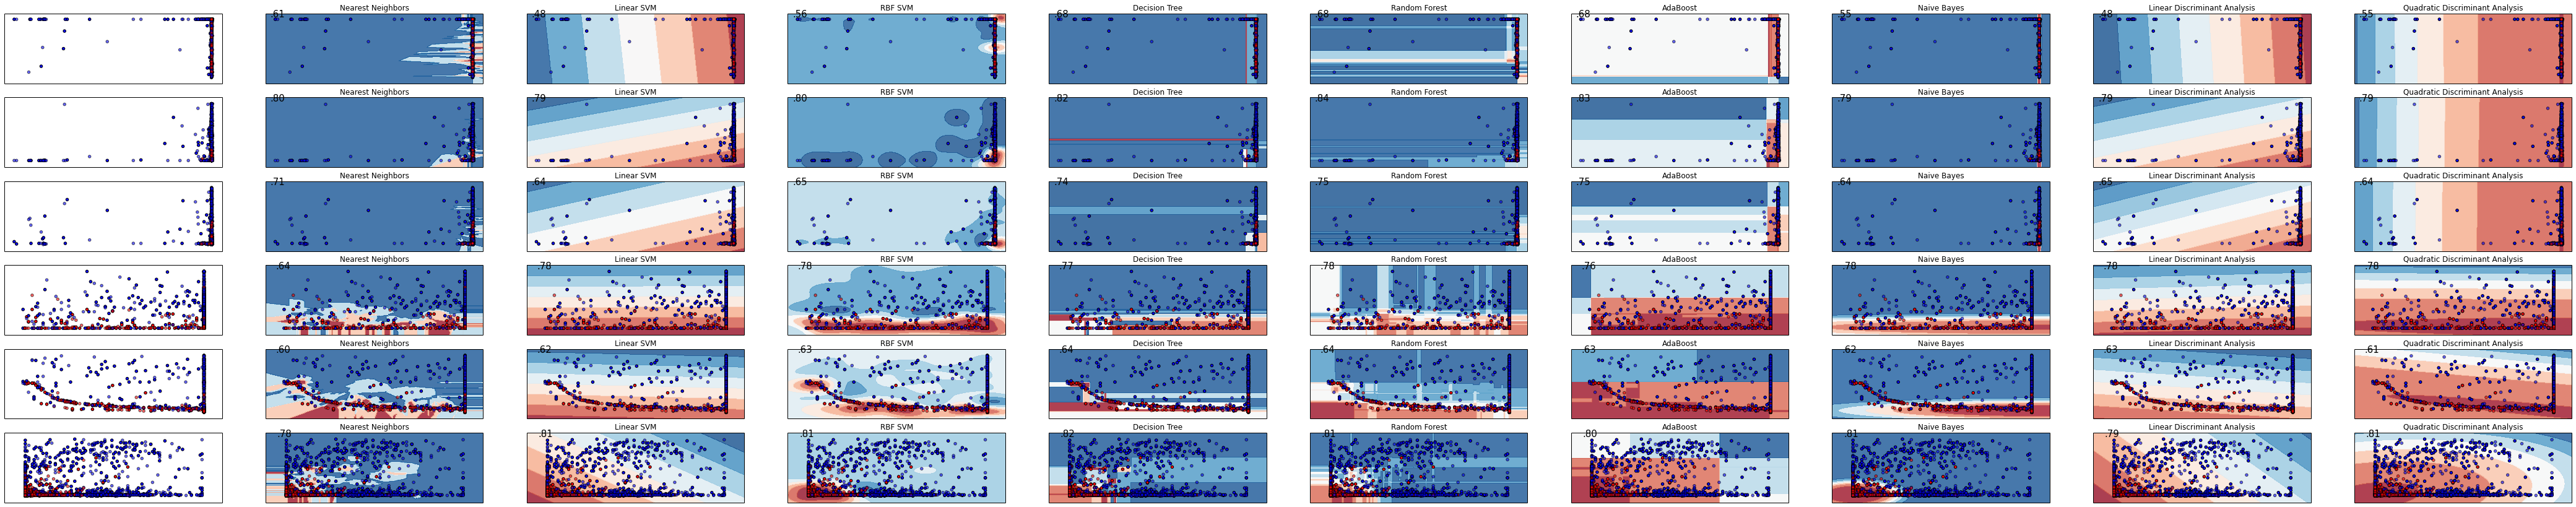

In [244]:
figure = plt.figure(figsize=(60, 36))
i = 1
# iterate over datasets
for ds in datasets[5:11]:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.min() + .3, yy.max() - .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='left')
        i += 1

figure.subplots_adjust(left=.02, right=.98)

In [242]:
[1,2,3,4,5,5,78,9][0:2]

[1, 2]